## Summary: try and predict who will win womend football game based on 'home_team','away_team','tournament','country', and whether or not it was a neutral staydium 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/womens-international-football-results/results.csv


In [2]:
data = pd.read_csv('/kaggle/input/womens-international-football-results/results.csv')

In [3]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True


In [4]:
home_wins = np.where(data['home_score']>data['away_score'],1,0)

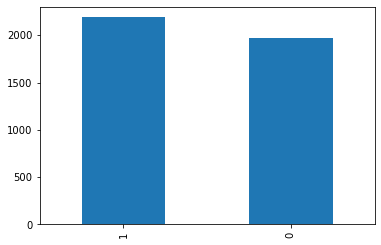

In [5]:
pd.Series(home_wins).value_counts().plot.bar()

In [7]:
# home percent win rate
pd.Series(home_wins).value_counts()[1] / (pd.Series(home_wins).value_counts()[1] + pd.Series(home_wins).value_counts()[0])

0.5258227239971175

In [8]:
from sklearn.preprocessing import OneHotEncoder

X = data[['home_team','away_team','tournament','country','neutral']]

In [9]:
cat_encoder = OneHotEncoder()
game_cat_1hot = cat_encoder.fit_transform(X)


In [10]:
X_clean = game_cat_1hot.toarray()

In [11]:
X_clean.shape

(4163, 541)

In [12]:
y = home_wins

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X_clean,y, test_size=0.2, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [15]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7635054021608644
RandomForestClassifier 0.7022809123649459
SVC 0.7322929171668667
VotingClassifier 0.7406962785114045


In [16]:
y_pred = log_clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[283, 120],
       [ 77, 353]])